<a href="https://colab.research.google.com/github/elsye9/New-Repository/blob/main/iris_uas_170030274.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b>Analisis Dataset</b>

In [ ]:
import pandas as pd
import numpy as np
# import necessary packages
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.naive_bayes as nb
import seaborn as sns
import sklearn.metrics as met


%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.datasets import load_boston
import sklearn.linear_model as lm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , precision_score
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [ ]:
df = pd.read_csv('iris.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  145 non-null    float64
 1   sepal.width   137 non-null    float64
 2   petal.length  144 non-null    float64
 3   petal.width   150 non-null    float64
 4   quality       150 non-null    object 
 5   variety       150 non-null    object 
dtypes: float64(4), object(2)
memory usage: 7.2+ KB


In [ ]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,quality,variety
0,5.1,3.5,1.4,0.2,Yes,Setosa
1,4.9,3.0,1.4,0.2,Yes,Setosa
2,4.7,3.2,1.3,0.2,Yes,Setosa
3,4.6,3.1,1.5,0.2,Yes,Setosa
4,5.0,3.6,1.4,0.2,Yes,Setosa


In [ ]:
df.tail()

,sepal.length,sepal.width,petal.length,petal.width,quality,variety
145,6.7,3.0,5.2,2.3,Absent,Virginica
146,6.3,2.5,5.0,1.9,Absent,Virginica
147,6.5,3.0,5.2,2.0,Absent,Virginica
148,6.2,3.4,5.4,2.3,Absent,Virginica
149,5.9,3.0,5.1,1.8,Absent,Virginica


In [ ]:
df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,145.000000,137.000000,144.000000,150.000000
mean,5.858621,3.046715,3.797917,1.199333
std,0.828032,0.433530,1.769733,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
list_item =[]
for col in df.columns:
    list_item.append([col,df[col].dtype, df[col].isna().sum(), 100*df[col].isna().sum()/len(df[col]),df[col].unique(), df[col].unique()[:4]])
desc_df = pd.DataFrame(data=list_item, columns='Feature Data_type Null_num Null_pct Unique_num Unique_sample'.split())
desc_df

,Feature,Data_type,Null_num,Null_pct,Unique_num,Unique_sample
0,sepal.length,float64,5,3.333333,"[5.1, 4.9, 4.7, 4.6, 5.0, 5.4, nan, 4.4, 4.8, ...","[5.1, 4.9, 4.7, 4.6]"
1,sepal.width,float64,13,8.666667,"[3.5, 3.0, 3.2, 3.1, 3.6, 3.9, 3.4, nan, 3.7, ...","[3.5, 3.0, 3.2, 3.1]"
2,petal.length,float64,6,4.000000,"[1.4, 1.3, 1.5, 1.7, 1.6, 1.1, 1.2, 1.0, 1.9, ...","[1.4, 1.3, 1.5, 1.7]"
3,petal.width,float64,0,0.000000,"[0.2, 0.4, 0.3, 0.1, 0.5, 0.6, 1.4, 1.5, 1.3, ...","[0.2, 0.4, 0.3, 0.1]"
4,quality,object,0,0.000000,"[Yes, No, Absent]","[Yes, No, Absent]"
5,variety,object,0,0.000000,"[Setosa, Versicolor, Virginica]","[Setosa, Versicolor, Virginica]"


<b>Missing Value Handling</b>

In [ ]:
df.isnull().sum()

sepal.length     5
sepal.width     13
petal.length     6
petal.width      0
quality          0
variety          0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy="median")
df[['sepal.length', 'sepal.width', 'petal.length']] = imputer.fit_transform(df[['sepal.length', 'sepal.width', 'petal.length']])

In [ ]:
df

,sepal.length,sepal.width,petal.length,petal.width,quality,variety
0,5.1,3.5,1.4,0.2,Yes,Setosa
1,4.9,3.0,1.4,0.2,Yes,Setosa
2,4.7,3.2,1.3,0.2,Yes,Setosa
3,4.6,3.1,1.5,0.2,Yes,Setosa
4,5.0,3.6,1.4,0.2,Yes,Setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Absent,Virginica
146,6.3,2.5,5.0,1.9,Absent,Virginica
147,6.5,3.0,5.2,2.0,Absent,Virginica
148,6.2,3.4,5.4,2.3,Absent,Virginica


In [ ]:
df.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
quality         0
variety         0
dtype: int64

<b>Categorical Data Handling</b>

In [ ]:
pd.get_dummies(df, columns=['quality'], drop_first=True)

,sepal.length,sepal.width,petal.length,petal.width,variety,quality_No,quality_Yes
0,5.1,3.5,1.4,0.2,Setosa,0,1
1,4.9,3.0,1.4,0.2,Setosa,0,1
2,4.7,3.2,1.3,0.2,Setosa,0,1
3,4.6,3.1,1.5,0.2,Setosa,0,1
4,5.0,3.6,1.4,0.2,Setosa,0,1
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica,0,0
146,6.3,2.5,5.0,1.9,Virginica,0,0
147,6.5,3.0,5.2,2.0,Virginica,0,0
148,6.2,3.4,5.4,2.3,Virginica,0,0


In [ ]:
dict_class = {'Setosa':0, 'Versicolor':1, 'Virginica':2}
df['variety'] = df['variety'].replace(dict_class)

In [ ]:
X = df.drop(["quality","variety"], axis=1)
y = df["variety"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
X

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: variety, Length: 150, dtype: int64

In [ ]:
X

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

<b>Correlation Analysis</b>

In [ ]:
pip install klib

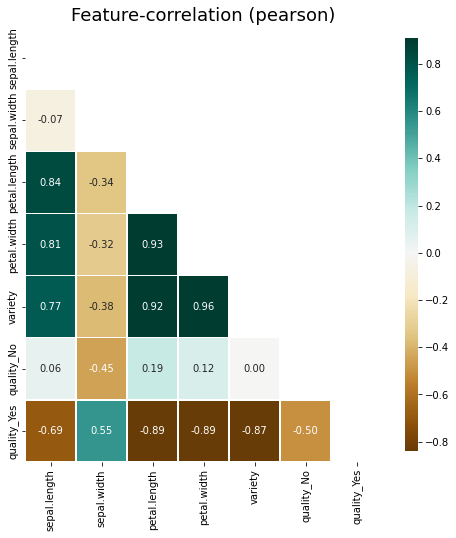

In [ ]:
import klib

klib_df = pd.get_dummies(df, columns=['quality'], drop_first=True)
klib.corr_plot(klib_df, annot=True, figsize= (8,8))

<b>Classification Without Outlier Detection</b>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = model.predict(X_test)

score = accuracy_score(y_test, y_pred)
print('Accuracy Score:', score)

Accuracy Score: 1.0


In [ ]:
y_pred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 2, 1, 0, 0, 1, 2])

In [ ]:
y_test

14     0
98     1
75     1
16     0
131    2
56     1
141    2
44     0
29     0
120    2
94     1
5      0
102    2
51     1
78     1
42     0
92     1
66     1
31     0
35     0
90     1
84     1
77     1
40     0
125    2
99     1
33     0
19     0
73     1
146    2
Name: variety, dtype: int64

<b>Classification With Outlier Detection</b>

In [ ]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.1)
y_pred = iso.fit_predict(X_train)
print("Total Outlier : ", (y_pred==-1).sum())

Total Outlier :  12


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
print('X_train shape : ', X_train.shape)
print('y_train shape : ', y_train.shape)

X_train shape :  (120, 4)
y_train shape :  (120,)


In [ ]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = model.predict(X_test)

score = accuracy_score(y_test, y_pred)
print('Accuracy Score After Outlier Detection :', score)

Accuracy Score After Outlier Detection : 1.0


In [ ]:
y_pred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 2, 1, 0, 0, 1, 2])

In [ ]:
y_test

14     0
98     1
75     1
16     0
131    2
56     1
141    2
44     0
29     0
120    2
94     1
5      0
102    2
51     1
78     1
42     0
92     1
66     1
31     0
35     0
90     1
84     1
77     1
40     0
125    2
99     1
33     0
19     0
73     1
146    2
Name: variety, dtype: int64

Naive Bayes

In [ ]:
#perhitungan Gaussioan NB
gnb = nb.GaussianNB()
gnb.fit(X_train, y_train)

y_preds = gnb.predict(X_test)
y_preds

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2])

In [ ]:
print("Train set Accuracy:"+str(accuracy_score(y_train,gnb.predict(X_train))*100))
print("Test set Accuracy:"+str(accuracy_score(y_test,gnb.predict(X_test))*100))

Train set Accuracy:95.0
Test set Accuracy:96.66666666666667


In [ ]:
a = confusion_matrix(y_test,y_preds)

print('Confusion matrix\n\n', a)

print('\nTrue Positives(TP) = ', a[0,0])

print('\nTrue Negatives(TN) = ', a[1,1])

print('\nFalse Positives(FP) = ', a[0,1])

print('\nFalse Negatives(FN) = ', a[1,0])

TP1 = a[0,0]
TN1= a[1,1]
FP1= a[0,1]
FN1= a[1,0]

classification_accuracy = (TP1 + TN1) / float(TP1 + TN1 + FP1 + FN1)
precision = TP1 / float(TP1 + FP1)
recalll = TP1 / float(TP1 + FN1)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))
print('Recall or Sensitivity : {0:0.4f}'.format(recalll))
print('Precision : {0:0.4f}'.format(precision))

Confusion matrix

 [[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]

True Positives(TP) =  11

True Negatives(TN) =  12

False Positives(FP) =  0

False Negatives(FN) =  0
Classification accuracy : 1.0000
Recall or Sensitivity : 1.0000
Precision : 1.0000


In [ ]:
y_pred_prob = gnb.predict_proba(X_test)[0:10]

y_pred_prob

array([[1.00000000e+00, 7.72036089e-16, 1.01571466e-22],
       [9.02028121e-15, 9.99999518e-01, 4.81949994e-07],
       [1.41093373e-33, 9.75971612e-01, 2.40283882e-02],
       [1.00000000e+00, 1.24711674e-15, 1.37613696e-22],
       [8.43711077e-80, 4.18385160e-10, 1.00000000e+00],
       [1.05299415e-42, 6.53809967e-01, 3.46190033e-01],
       [3.36054755e-94, 2.71823761e-07, 9.99999728e-01],
       [1.00000000e+00, 9.50377869e-13, 1.20838340e-19],
       [1.00000000e+00, 4.40503547e-16, 4.25093002e-23],
       [1.10506120e-95, 6.72002503e-09, 9.99999993e-01]])

In [ ]:
gnb.predict_proba(X_test)[0:10, 1]

array([7.72036089e-16, 9.99999518e-01, 9.75971612e-01, 1.24711674e-15,
       4.18385160e-10, 6.53809967e-01, 2.71823761e-07, 9.50377869e-13,
       4.40503547e-16, 6.72002503e-09])

In [ ]:
y_pred1 = gnb.predict_proba(X_test)[:, 1]

In [ ]:
train_pred = gnb.predict(X_train)
test_pred = gnb.predict(X_test)

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(gnb, X_train, y_train, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Cross-validation scores:[0.95833333 0.95833333 0.95833333 0.95833333 0.875     ]
Average cross-validation score: 0.9417


In [ ]:
print (confusion_matrix(y_train,train_pred))#confusion matrix data test

[[39  0  0]
 [ 0 34  3]
 [ 0  3 41]]


In [ ]:
accura = met.accuracy_score(y_test,y_preds)
print('acur=',accura)

acur= 0.9666666666666667


In [ ]:
#hasil Perhitungan GaussionNB
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds ))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

r = RandomForestClassifier(n_estimators = 20, random_state= 0 )
r.fit(X_train,y_train)
prediction =r.predict(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

r = RandomForestClassifier(n_estimators = 20, random_state= 0 )
r.fit(x_train,y_train)
prediction =r.predict(x_test)

In [ ]:
print("Train set  :"+str(accuracy_score(y_train,r.predict(x_train))*100))
print("Test set Accuracy:"+str(accuracy_score(y_test,r.predict(x_test))*100))

Train set  :99.16666666666667
Test set Accuracy:96.66666666666667


In [ ]:
b = confusion_matrix(y_test,y_preds)

print('Confusion matrix\n\n', b)

print('\nTrue Positives(TP) = ', b[0,0])

print('\nTrue Negatives(TN) = ', b[1,1])

print('\nFalse Positives(FP) = ', b[0,1])

print('\nFalse Negatives(FN) = ', b[1,0])

Confusion matrix

 [[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]

True Positives(TP) =  11

True Negatives(TN) =  12

False Positives(FP) =  0

False Negatives(FN) =  0


In [ ]:
tp = b[0,0]
tn= b[1,1]
fp= b[0,1]
fn= b[1,0]

classification_accuracy = (tp + tn) / float(tp + tn + fp + fn)
precisio = TP1 / float(TP1 + FP1)
recalll = TP1 / float(TP1 + FN1)
specificity = TN1 / (TN1 + FP1)
print('Recall or Sensitivity : {0:0.4f}'.format(recalll))
print('Precision : {0:0.4f}'.format(precision))
print('Specificity : {0:0.4f}'.format(specificity))
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Recall or Sensitivity : 1.0000
Precision : 1.0000
Specificity : 1.0000
Classification accuracy : 1.0000


In [ ]:
true_positive_rate = TP1 / float(TP1 + FN1)
false_positive_rate = FP1 / float(FP1 + TN1)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

False Positive Rate : 0.0000
True Positive Rate : 1.0000


In [ ]:
#hasil Perhitungan GaussionNB
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds ))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



**Decission** **Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)
y_prediksi = model.predict(X_test)
print(y_prediksi)

[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 2 0 2 1 0 0 1 2]


In [ ]:
print("Train set  :"+str(accuracy_score(y_train,r.predict(X_train))*100))
print("Test set Accuracy:"+str(accuracy_score(y_test,r.predict(X_test))*100))

Train set  :99.16666666666667
Test set Accuracy:96.66666666666667


In [ ]:
d = confusion_matrix(y_test,y_preds)

print('Confusion matrix\n\n', d)

print('\nTrue Positives(TP) = ', d[0,0])

print('\nTrue Negatives(TN) = ', d[1,1])

print('\nFalse Positives(FP) = ', d[0,1])

print('\nFalse Negatives(FN) = ', d[1,0])

Confusion matrix

 [[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]

True Positives(TP) =  11

True Negatives(TN) =  12

False Positives(FP) =  0

False Negatives(FN) =  0


In [ ]:
tp1 = d[0,0]
tn1= d[1,1]
fp1= d[0,1]
fn1= d[1,0]

classification_accuracy = (tp1 + tn1) / float(tp1 + tn1 + fp1 + fn1)
precisio = tp1 / float(tp1 + fp1)
recalll = tp1 / float(tp1 + fn1)
specificity = tp1 / (tn1 + fp1)
print('Recall or Sensitivity : {0:0.4f}'.format(recalll))
print('Precision : {0:0.4f}'.format(precision))
print('Specificity : {0:0.4f}'.format(specificity))
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Recall or Sensitivity : 1.0000
Precision : 1.0000
Specificity : 0.9167
Classification accuracy : 1.0000


In [ ]:
#hasil Perhitungan
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds ))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



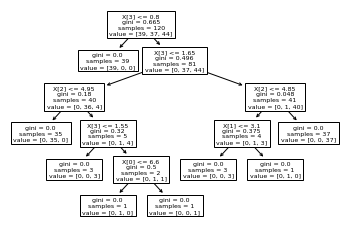

In [ ]:
tree.plot_tree(model);